In [1]:
import json
import pandas as pd
import re
import numpy as np 

In [2]:
data = pd.read_json('sizes.json', lines=True)


In [3]:
data.head(10)

,__v,_id,created_at,filter_label,label,old_label,updated_at
0,0,{'$oid': '557abe8565950003006fefe7'},{'$date': '2015-06-12T11:12:05.248Z'},S,26,[26\],{'$date': '2015-07-07T16:29:11.868Z'}
1,0,{'$oid': '557abe8565950003006fefe5'},{'$date': '2015-06-12T11:12:05.244Z'},XS,24,"[24, 24\]",{'$date': '2015-07-07T16:27:03.743Z'}
2,0,{'$oid': '557abe8565950003006fefe8'},{'$date': '2015-06-12T11:12:05.249Z'},S,28,[28\],{'$date': '2015-07-07T16:36:22.139Z'}
3,0,{'$oid': '557abe8565950003006fefe6'},{'$date': '2015-06-12T11:12:05.247Z'},S,25,[25],{'$date': '2015-07-07T16:29:03.370Z'}
4,0,{'$oid': '557abe8565950003006fefe9'},{'$date': '2015-06-12T11:12:05.249Z'},M,30,[30\],{'$date': '2015-07-07T16:44:25.382Z'}
5,0,{'$oid': '557abe8565950003006ff021'},{'$date': '2015-06-12T11:12:05.269Z'},0-1 years,6 - 12 months,"[6 - 12m, 6-12 months, 6-12m, 6- 12 Months, 6 ...",{'$date': '2015-07-07T16:19:16.195Z'}
6,0,{'$oid': '557abe8565950003006ff025'},{'$date': '2015-06-12T11:12:05.270Z'},0-1 years,3 - 6 months,"[3 - 6 months, 3 - 6m, 3-6 Months, 3-6m, EU 16...",{'$date': '2015-07-07T16:12:48.379Z'}
7,0,{'$oid': '557abe8565950003006ff033'},{'$date': '2015-06-12T11:12:05.275Z'},1-2 years,2 years,"[2yrs, 2 years, 2y, Age 2, 2 years (92), 2 yea...",{'$date': '2015-07-07T16:12:06.255Z'}
8,0,{'$oid': '557abe8565950003006feffa'},{'$date': '2015-06-12T11:12:05.258Z'},NaN,54,[54],{'$date': '2015-06-12T11:12:05.457Z'}
9,0,{'$oid': '557abe8565950003006feff7'},{'$date': '2015-06-12T11:12:05.257Z'},NaN,48,[48],{'$date': '2015-06-12T11:12:05.456Z'}


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51210 entries, 0 to 51209
Data columns (total 7 columns):
__v             51210 non-null int64
_id             51210 non-null object
created_at      51210 non-null object
filter_label    294 non-null object
label           51210 non-null object
old_label       51210 non-null object
updated_at      51210 non-null object
dtypes: int64(1), object(6)
memory usage: 2.7+ MB


In [5]:
column_names=list(data)

In [6]:
column_types=[type(data._id[0]),
type(data.__v[0]),
type(data.created_at[0]),
type(data.filter_label[0]),
type(data.label[0]),
type(data.old_label[0]),
type(data.updated_at[0])]

In [7]:
for i in range (0,len(column_names)):
    print(column_names[i],column_types[i])

__v <class 'dict'>
_id <class 'numpy.int64'>
created_at <class 'dict'>
filter_label <class 'str'>
label <class 'str'>
old_label <class 'list'>
updated_at <class 'dict'>


In [8]:
data.isnull().sum()

__v                 0
_id                 0
created_at          0
filter_label    50916
label               0
old_label           0
updated_at          0
dtype: int64

**Observations**
- dataframe has 7 columns/ 51210 lines
- there are practically no missing values, except in column 'filter_label' where most of the values are missing. All other columns have no missing data
- after an initial glance at the dataframe, we can make the following assumption/hypothesis: 
    - in columns 'created_at' and 'updated_at' the dictionary key holds reference to the information provided, and dictionary value holds the information (date / time of data entry)
    - in columns 'created_at' and 'updated_at' dictionary key holds only one value 
    - columns' 'filter_label', 'label' and 'old_label' entries are lists which hold 1 or more values, with no particular pattern 
    

**Potential Issues**
- dataframe entries are objects which is not the most suitable type for data manipulation
- as cells contain more than one value, it also makes descriptive analysis more complicated 
- columns' 'filter_label', 'label' and 'old_label' hold inconsistent data: for instance, we observe inconsistencies relating to data type, spelling, length of entry 
- as a result, the data presented in this format does not give an opportunity to control and maintain business processes relating to stock control/forecasting, sales analysis/forecasting and planning for elevated customer experience (smooth order process, attractive and relavent merchandise offering, personalised recommendations etc)

**Data Cleansing Strategy**  

* **STEP 1: columns 'created_at' and 'updated_at'**

- flatten the columns out: explore whether dictionary keys should become additional columns (depending on the information they present, and how many different key values we find), and assign dictionary values as cell values accordingly  

* **STEP2: label columns** 

*Column 'old_label' suggests containing the original values/information submitted by the boutiques and poses an issue of not only varied spelling, but also the type of data (information) provided.* 

*Dealing with this column should be done iteratively, taking small steps, and focusing on attempt to cluster the data and find similarities/connections between the data entries, removing duplicates and finally identifying what information is presented: for instance, colour of the item, size of the item etc.* 

*Consequently, we may need to create additional columns which would hold different types of information, such has: 'size', 'colour', 'shape' of the item*   

*Columns 'filter_label' and 'label' seem to hold the information resulting after some cleaning operations have been completed on 'old_label' column*

---

**STEP 1**

**Plan**
- separate dictionary keys and values 
- count the number of unique keys, and the number of unique values within a column

In [9]:
def flatten_dic(df,col_name):
    """store dictionary keys and values of the column in separate list"""
    keys=[]
    values=[]
    for index, row in data.iterrows():
        item=row[col_name]
        keys.extend(item.keys())
        values.extend(item.values())
    return keys, values

In [10]:
def check_unique(item):
    """count unique keys and unique values within a column"""
    unq_items=set(item)
    return len(unq_items)

In [11]:
def clean_col(data,col_name):
    '''extract the dictionary value, and assign it cell value '''
    for index,row in data.iterrows():
        item=row[col_name]
        value=list(item.values())    
        data.loc[data.index[index], col_name]=str(value[0])
    return data
 

In [12]:
def into_string(data):
    for index,row in data.iterrows():
        item=row['old_label']
        item=', '.join(item)
        item=re.sub('[^A-Za-z0-9,-]+', ' ', item)
        data.loc[data.index[index], 'old_label']=item
    return data


In [13]:


def add_infotype(data):
    for index,row in data.iterrows():
        item=row['old_label']
        label=[]
        """ split the sentence back into original sub-items, and assign the category for each item in the cell"""
        result=item.replace(' ','').split(',')
        for r in result:
            if r.isdigit():

                label.append('1')
            elif r.isalpha():

                label.extend('2')
            else:

                label.extend('3')
        final_label=set(label)

        """ if cell has more than one unique category, it needs to be assigned category 3 and cleaned further"""
        if len(final_label)==1:
            info_type1=list(final_label)[0]
            
            data.loc[index,['info_type']] = info_type1
            
        else:
            info_type2='3'
            data.loc[index,['info_type']] = info_type2
    return data
            

In [14]:
col_name='_id'
col_name2='created_at'
col_name3='updated_at'

In [15]:
keys_id, values_id= flatten_dic(data, col_name)
keys_cr_at, values_cr_at=flatten_dic(data,col_name2)
keys_updt_at, values_updt_at=flatten_dic(data,col_name3)


In [16]:
print('col _id unique keys:', check_unique(keys_id), ';' , 'col _id unique values:', check_unique(values_id))

col _id unique keys: 1 ; col _id unique values: 51210


In [17]:
print('col created_at unique keys:', check_unique(keys_cr_at), ';' , 'col created_at unique values:', check_unique(values_cr_at))

col created_at unique keys: 1 ; col created_at unique values: 43535


In [18]:
print('col updt_at unique keys:', check_unique(keys_updt_at), ';' , 'col updt_at unique values:', check_unique(values_updt_at))

col updt_at unique keys: 1 ; col updt_at unique values: 46594


**Observations**
- Only 1 unique key value across all lines/per column
- We can clean up each cell/per column by removing the dictionary key. The key relates to the current name of the column. 


In [19]:
clean_col(data, '_id')


,__v,_id,created_at,filter_label,label,old_label,updated_at
0,0,557abe8565950003006fefe7,{'$date': '2015-06-12T11:12:05.248Z'},S,26,[26\],{'$date': '2015-07-07T16:29:11.868Z'}
1,0,557abe8565950003006fefe5,{'$date': '2015-06-12T11:12:05.244Z'},XS,24,"[24, 24\]",{'$date': '2015-07-07T16:27:03.743Z'}
2,0,557abe8565950003006fefe8,{'$date': '2015-06-12T11:12:05.249Z'},S,28,[28\],{'$date': '2015-07-07T16:36:22.139Z'}
3,0,557abe8565950003006fefe6,{'$date': '2015-06-12T11:12:05.247Z'},S,25,[25],{'$date': '2015-07-07T16:29:03.370Z'}
4,0,557abe8565950003006fefe9,{'$date': '2015-06-12T11:12:05.249Z'},M,30,[30\],{'$date': '2015-07-07T16:44:25.382Z'}
5,0,557abe8565950003006ff021,{'$date': '2015-06-12T11:12:05.269Z'},0-1 years,6 - 12 months,"[6 - 12m, 6-12 months, 6-12m, 6- 12 Months, 6 ...",{'$date': '2015-07-07T16:19:16.195Z'}
6,0,557abe8565950003006ff025,{'$date': '2015-06-12T11:12:05.270Z'},0-1 years,3 - 6 months,"[3 - 6 months, 3 - 6m, 3-6 Months, 3-6m, EU 16...",{'$date': '2015-07-07T16:12:48.379Z'}
7,0,557abe8565950003006ff033,{'$date': '2015-06-12T11:12:05.275Z'},1-2 years,2 years,"[2yrs, 2 years, 2y, Age 2, 2 years (92), 2 yea...",{'$date': '2015-07-07T16:12:06.255Z'}
8,0,557abe8565950003006feffa,{'$date': '2015-06-12T11:12:05.258Z'},NaN,54,[54],{'$date': '2015-06-12T11:12:05.457Z'}
9,0,557abe8565950003006feff7,{'$date': '2015-06-12T11:12:05.257Z'},NaN,48,[48],{'$date': '2015-06-12T11:12:05.456Z'}


In [20]:
clean_col(data, col_name2)

,__v,_id,created_at,filter_label,label,old_label,updated_at
0,0,557abe8565950003006fefe7,2015-06-12T11:12:05.248Z,S,26,[26\],{'$date': '2015-07-07T16:29:11.868Z'}
1,0,557abe8565950003006fefe5,2015-06-12T11:12:05.244Z,XS,24,"[24, 24\]",{'$date': '2015-07-07T16:27:03.743Z'}
2,0,557abe8565950003006fefe8,2015-06-12T11:12:05.249Z,S,28,[28\],{'$date': '2015-07-07T16:36:22.139Z'}
3,0,557abe8565950003006fefe6,2015-06-12T11:12:05.247Z,S,25,[25],{'$date': '2015-07-07T16:29:03.370Z'}
4,0,557abe8565950003006fefe9,2015-06-12T11:12:05.249Z,M,30,[30\],{'$date': '2015-07-07T16:44:25.382Z'}
5,0,557abe8565950003006ff021,2015-06-12T11:12:05.269Z,0-1 years,6 - 12 months,"[6 - 12m, 6-12 months, 6-12m, 6- 12 Months, 6 ...",{'$date': '2015-07-07T16:19:16.195Z'}
6,0,557abe8565950003006ff025,2015-06-12T11:12:05.270Z,0-1 years,3 - 6 months,"[3 - 6 months, 3 - 6m, 3-6 Months, 3-6m, EU 16...",{'$date': '2015-07-07T16:12:48.379Z'}
7,0,557abe8565950003006ff033,2015-06-12T11:12:05.275Z,1-2 years,2 years,"[2yrs, 2 years, 2y, Age 2, 2 years (92), 2 yea...",{'$date': '2015-07-07T16:12:06.255Z'}
8,0,557abe8565950003006feffa,2015-06-12T11:12:05.258Z,NaN,54,[54],{'$date': '2015-06-12T11:12:05.457Z'}
9,0,557abe8565950003006feff7,2015-06-12T11:12:05.257Z,NaN,48,[48],{'$date': '2015-06-12T11:12:05.456Z'}


In [21]:
clean_col(data, col_name3)

,__v,_id,created_at,filter_label,label,old_label,updated_at
0,0,557abe8565950003006fefe7,2015-06-12T11:12:05.248Z,S,26,[26\],2015-07-07T16:29:11.868Z
1,0,557abe8565950003006fefe5,2015-06-12T11:12:05.244Z,XS,24,"[24, 24\]",2015-07-07T16:27:03.743Z
2,0,557abe8565950003006fefe8,2015-06-12T11:12:05.249Z,S,28,[28\],2015-07-07T16:36:22.139Z
3,0,557abe8565950003006fefe6,2015-06-12T11:12:05.247Z,S,25,[25],2015-07-07T16:29:03.370Z
4,0,557abe8565950003006fefe9,2015-06-12T11:12:05.249Z,M,30,[30\],2015-07-07T16:44:25.382Z
5,0,557abe8565950003006ff021,2015-06-12T11:12:05.269Z,0-1 years,6 - 12 months,"[6 - 12m, 6-12 months, 6-12m, 6- 12 Months, 6 ...",2015-07-07T16:19:16.195Z
6,0,557abe8565950003006ff025,2015-06-12T11:12:05.270Z,0-1 years,3 - 6 months,"[3 - 6 months, 3 - 6m, 3-6 Months, 3-6m, EU 16...",2015-07-07T16:12:48.379Z
7,0,557abe8565950003006ff033,2015-06-12T11:12:05.275Z,1-2 years,2 years,"[2yrs, 2 years, 2y, Age 2, 2 years (92), 2 yea...",2015-07-07T16:12:06.255Z
8,0,557abe8565950003006feffa,2015-06-12T11:12:05.258Z,NaN,54,[54],2015-06-12T11:12:05.457Z
9,0,557abe8565950003006feff7,2015-06-12T11:12:05.257Z,NaN,48,[48],2015-06-12T11:12:05.456Z


In [22]:
data.head()

,__v,_id,created_at,filter_label,label,old_label,updated_at
0,0,557abe8565950003006fefe7,2015-06-12T11:12:05.248Z,S,26,[26\],2015-07-07T16:29:11.868Z
1,0,557abe8565950003006fefe5,2015-06-12T11:12:05.244Z,XS,24,"[24, 24\]",2015-07-07T16:27:03.743Z
2,0,557abe8565950003006fefe8,2015-06-12T11:12:05.249Z,S,28,[28\],2015-07-07T16:36:22.139Z
3,0,557abe8565950003006fefe6,2015-06-12T11:12:05.247Z,S,25,[25],2015-07-07T16:29:03.370Z
4,0,557abe8565950003006fefe9,2015-06-12T11:12:05.249Z,M,30,[30\],2015-07-07T16:44:25.382Z


**Observations**
- 'created_at' and 'updated_at' columns point to the date of the entry and should by converted to datetime type


In [23]:
data['created_at']  = pd.to_datetime(data['created_at'])
data['updated_at']  = pd.to_datetime(data['updated_at'])

In [24]:
data.head()

,__v,_id,created_at,filter_label,label,old_label,updated_at
0,0,557abe8565950003006fefe7,2015-06-12 11:12:05.248,S,26,[26\],2015-07-07 16:29:11.868
1,0,557abe8565950003006fefe5,2015-06-12 11:12:05.244,XS,24,"[24, 24\]",2015-07-07 16:27:03.743
2,0,557abe8565950003006fefe8,2015-06-12 11:12:05.249,S,28,[28\],2015-07-07 16:36:22.139
3,0,557abe8565950003006fefe6,2015-06-12 11:12:05.247,S,25,[25],2015-07-07 16:29:03.370
4,0,557abe8565950003006fefe9,2015-06-12 11:12:05.249,M,30,[30\],2015-07-07 16:44:25.382


---

**STEP 2** 

**Plan**
- we observe, that each cell contains a list of items.
- convert the list into a string, separated by ','
- once the list is converted to a string, we can clean special characters as part of the first iterations of the cleaning exercise.
- following the initial exploratin of the data set, I suggest keeping numerical and alphabetical characters, and "-", which is common characteristics of what would appear on merchandise label. 

---

- identify if a cell contains numbers only, strings only, combination of both (could be within a string, could be within a cell) 

- based on that, assign each cell to a category:
    * #1: numbers only  
    * #2: alpha characters only
    * #3 combination of both: either within a string, or, within the cell 
    
- once the categories have been assigned, I suggest the following: 
    * #1: numbers only: through exploratory analysis identify if the data is interval/ratio 
    * #1: explore distribution, outliers, median/mean values, if applicable
    * #1: info above could form further hypothesis what information this data may present. For instance, clothing                 sizes/shoe size?
    
    * #2: alpha characters only: explore distribution, unique values 
    * #2: form a word corpus, apply NLP techniques in order to: explore potential word clusters? identify word groups?          (verb, adjective, noun?) predict information type? (colour? pattern? location? etc?)             
    * #2: experiment with NLP in order to clean the spelling looping through the dataframe line-by-line 
    
- further cleaning iterations needed for category 3:
    
    * #3 further iterations may include: alternative splitting strategies (split by comma?/ space? ) 
    * #3 further iterations may include: after each splitting strategy check for the number of unique values (do any          of the words repeat throughout the dataframe?)  
    * #3 further iterations may include: identify lines where combination of alpha / numerical characters are within          one string and/or within once cell? Explore unique values/ distribution 
    * #3 further iterations may include: explore how strings are distributed across the dataframe before any splitting          strategies(ie, analyse all lines as they are, just after assigning them to category 3)


---

In [25]:
data=into_string(data)

In [26]:
data.head()

,__v,_id,created_at,filter_label,label,old_label,updated_at
0,0,557abe8565950003006fefe7,2015-06-12 11:12:05.248,S,26,26,2015-07-07 16:29:11.868
1,0,557abe8565950003006fefe5,2015-06-12 11:12:05.244,XS,24,"24, 24",2015-07-07 16:27:03.743
2,0,557abe8565950003006fefe8,2015-06-12 11:12:05.249,S,28,28,2015-07-07 16:36:22.139
3,0,557abe8565950003006fefe6,2015-06-12 11:12:05.247,S,25,25,2015-07-07 16:29:03.370
4,0,557abe8565950003006fefe9,2015-06-12 11:12:05.249,M,30,30,2015-07-07 16:44:25.382


In [27]:
#test if all lines have been converted to string 
#for index,row in data.iterrows():
    #item=row['old_label']
    #print(type(item))
    

- create and additional column ['info_type'] which will indicate what type of infomation is presented in column 'old_label'


In [28]:
data['info_type'] = ""
data['info_type'] = np.nan

In [29]:
data.head()

,__v,_id,created_at,filter_label,label,old_label,updated_at,info_type
0,0,557abe8565950003006fefe7,2015-06-12 11:12:05.248,S,26,26,2015-07-07 16:29:11.868,NaN
1,0,557abe8565950003006fefe5,2015-06-12 11:12:05.244,XS,24,"24, 24",2015-07-07 16:27:03.743,NaN
2,0,557abe8565950003006fefe8,2015-06-12 11:12:05.249,S,28,28,2015-07-07 16:36:22.139,NaN
3,0,557abe8565950003006fefe6,2015-06-12 11:12:05.247,S,25,25,2015-07-07 16:29:03.370,NaN
4,0,557abe8565950003006fefe9,2015-06-12 11:12:05.249,M,30,30,2015-07-07 16:44:25.382,NaN


In [30]:
add_infotype(data)

,__v,_id,created_at,filter_label,label,old_label,updated_at,info_type
0,0,557abe8565950003006fefe7,2015-06-12 11:12:05.248,S,26,26,2015-07-07 16:29:11.868,1
1,0,557abe8565950003006fefe5,2015-06-12 11:12:05.244,XS,24,"24, 24",2015-07-07 16:27:03.743,1
2,0,557abe8565950003006fefe8,2015-06-12 11:12:05.249,S,28,28,2015-07-07 16:36:22.139,1
3,0,557abe8565950003006fefe6,2015-06-12 11:12:05.247,S,25,25,2015-07-07 16:29:03.370,1
4,0,557abe8565950003006fefe9,2015-06-12 11:12:05.249,M,30,30,2015-07-07 16:44:25.382,1
5,0,557abe8565950003006ff021,2015-06-12 11:12:05.269,0-1 years,6 - 12 months,"6 - 12m, 6-12 months, 6-12m, 6- 12 Months, 6 -...",2015-07-07 16:19:16.195,3
6,0,557abe8565950003006ff025,2015-06-12 11:12:05.270,0-1 years,3 - 6 months,"3 - 6 months, 3 - 6m, 3-6 Months, 3-6m, EU 16 ...",2015-07-07 16:12:48.379,3
7,0,557abe8565950003006ff033,2015-06-12 11:12:05.275,1-2 years,2 years,"2yrs, 2 years, 2y, Age 2, 2 years 92 , 2 years...",2015-07-07 16:12:06.255,3
8,0,557abe8565950003006feffa,2015-06-12 11:12:05.258,NaN,54,54,2015-06-12 11:12:05.457,1
9,0,557abe8565950003006feff7,2015-06-12 11:12:05.257,NaN,48,48,2015-06-12 11:12:05.456,1


**Some exploratory analysis on the type of information held in column 'old_label'**

In [41]:
import matplotlib.pyplot as plt

In [31]:
data.head()

,__v,_id,created_at,filter_label,label,old_label,updated_at,info_type
0,0,557abe8565950003006fefe7,2015-06-12 11:12:05.248,S,26,26,2015-07-07 16:29:11.868,1
1,0,557abe8565950003006fefe5,2015-06-12 11:12:05.244,XS,24,"24, 24",2015-07-07 16:27:03.743,1
2,0,557abe8565950003006fefe8,2015-06-12 11:12:05.249,S,28,28,2015-07-07 16:36:22.139,1
3,0,557abe8565950003006fefe6,2015-06-12 11:12:05.247,S,25,25,2015-07-07 16:29:03.370,1
4,0,557abe8565950003006fefe9,2015-06-12 11:12:05.249,M,30,30,2015-07-07 16:44:25.382,1


In [99]:
data["info_type"] = pd.to_numeric(data["info_type"])

In [100]:
data.head()

,__v,_id,created_at,filter_label,label,old_label,updated_at,info_type
0,0,557abe8565950003006fefe7,2015-06-12 11:12:05.248,S,26,26,2015-07-07 16:29:11.868,1
1,0,557abe8565950003006fefe5,2015-06-12 11:12:05.244,XS,24,"24, 24",2015-07-07 16:27:03.743,1
2,0,557abe8565950003006fefe8,2015-06-12 11:12:05.249,S,28,28,2015-07-07 16:36:22.139,1
3,0,557abe8565950003006fefe6,2015-06-12 11:12:05.247,S,25,25,2015-07-07 16:29:03.370,1
4,0,557abe8565950003006fefe9,2015-06-12 11:12:05.249,M,30,30,2015-07-07 16:44:25.382,1


In [102]:
data[['info_type']].plot(kind='hist',bins=3,rwidth=1)
plt.rcParams["figure.figsize"] = [8,6]
plt.ylim(0, 20000)


(0, 20000)

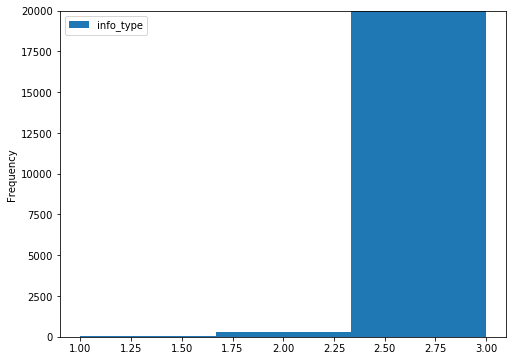

In [103]:
plt.show()

In [112]:
data['info_type'].value_counts()

3    50883
2      291
1       36
Name: info_type, dtype: int64

In [119]:
data.groupby('info_type')['old_label'].min()

info_type
1    10 
2      A
3       
Name: old_label, dtype: object

In [120]:
data.groupby('info_type')['old_label'].max()

info_type
1         62
2      water
3    size 40
Name: old_label, dtype: object

**Observations**
- it is apparent that purely numeric and alphabetical values form only a very small fraction of data in column 'old_label'
- numerical values range between 10 and 62 and form the smallest fractions of data dataframe
- as a result, next iterations of the cleaning exercise should focus on the strategies outlined above to experiment with values belonging to category 3: where data is a combination of alpha-numerical characters
